# Task 1 – Exploratory Data Analysis (EDA)

This notebook explores the news dataset and stock price data:
- Basic structure & summary statistics
- Missing values
- Distribution of headline length
- Articles per publisher
- Time-based trends


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [8]:
import pandas as pd

NEWS_PATH = "../../newsData/raw_analyst_ratings.csv"
PRICE_PATH = "../../yfinance_data/Data/AAPL.csv"

df_news = pd.read_csv(NEWS_PATH)
df_price = pd.read_csv(PRICE_PATH)

df_news.head(), df_price.head()


(   Unnamed: 0                                           headline  \
 0           0            Stocks That Hit 52-Week Highs On Friday   
 1           1         Stocks That Hit 52-Week Highs On Wednesday   
 2           2                      71 Biggest Movers From Friday   
 3           3       46 Stocks Moving In Friday's Mid-Day Session   
 4           4  B of A Securities Maintains Neutral on Agilent...   
 
                                                  url          publisher  \
 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
 
                         date stock  
 0  2020-06-05 10:30:54-04:00     A  
 1  2020-06-03 10:45:20-04:00     A  
 2  2020-05-

In [9]:
print("NEWS DATASET")
print(df_news.info())
print()
print("PRICE DATASET")
print(df_price.info())


NEWS DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

PRICE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
No

In [10]:
if "Unnamed: 0" in df_news.columns:
    df_news = df_news.drop(columns=["Unnamed: 0"])

df_news["date"] = pd.to_datetime(df_news["date"])
df_news.head()


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [11]:
df_news.columns


Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [12]:
df_news = df_news.dropna(subset=["date"])
df_news.head()


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [13]:
df_news["headline_length"] = df_news["headline"].astype(str).str.len()
df_news["headline_length"].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

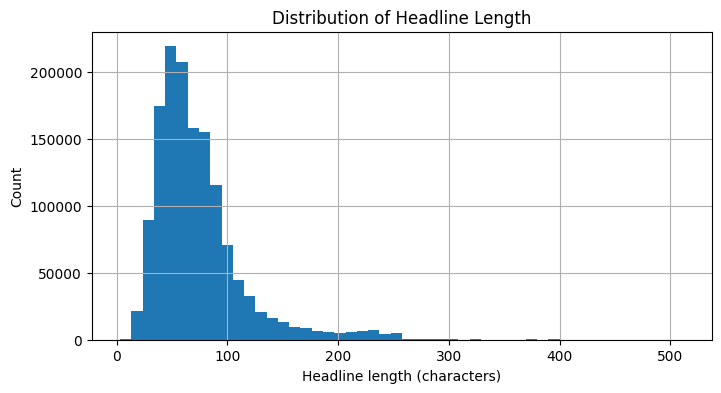

In [14]:
df_news["headline_length"].hist(bins=50, figsize=(8,4))
plt.xlabel("Headline length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Headline Length")
plt.show()


In [15]:
publisher_counts = df_news["publisher"].value_counts().head(20)
publisher_counts


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

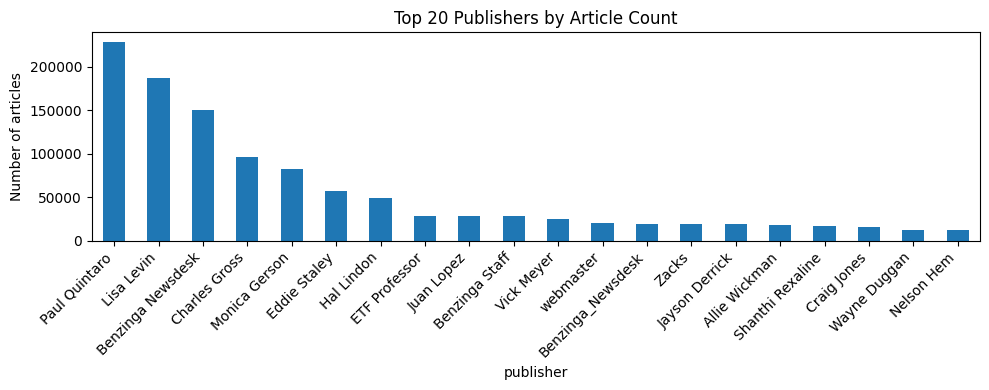

In [16]:
publisher_counts.plot(kind="bar", figsize=(10,4))
plt.title("Top 20 Publishers by Article Count")
plt.ylabel("Number of articles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [18]:
# Fix the date column
df_news["date"] = pd.to_datetime(df_news["date"], errors="coerce")

# Check the result
df_news["date"].head()
df_news.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype                    
---  ------           --------------    -----                    
 0   headline         1407328 non-null  object                   
 1   url              1407328 non-null  object                   
 2   publisher        1407328 non-null  object                   
 3   date             55987 non-null    datetime64[ns, UTC-04:00]
 4   stock            1407328 non-null  object                   
 5   headline_length  1407328 non-null  int64                    
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB


In [20]:
df_price["Date"] = pd.to_datetime(df_price["Date"])
df_price = df_price.sort_values("Date")
df_price.set_index("Date", inplace=True)

df_price[["Close", "Volume"]].head()


,Close,Volume
Date,,
2009-01-02,2.721686,746015200
2009-01-05,2.836553,1181608400
2009-01-06,2.789767,1289310400
2009-01-07,2.729484,753048800
2009-01-08,2.780169,673500800


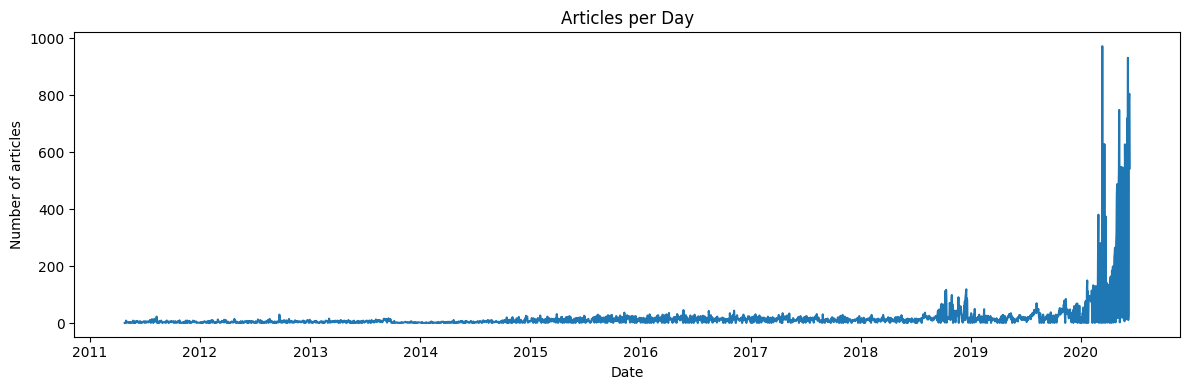

In [21]:
df_news["date_only"] = df_news["date"].dt.date
articles_per_day = df_news["date_only"].value_counts().sort_index()

articles_per_day.plot(figsize=(12,4))
plt.title("Articles per Day")
plt.xlabel("Date")
plt.ylabel("Number of articles")
plt.tight_layout()
plt.show()


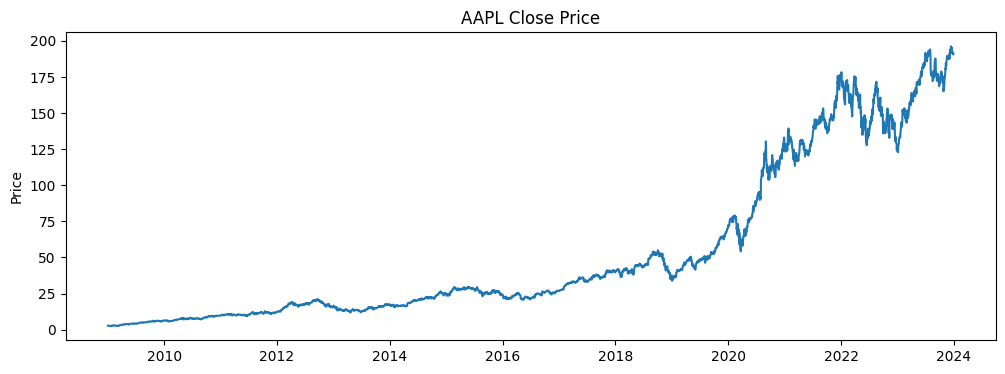

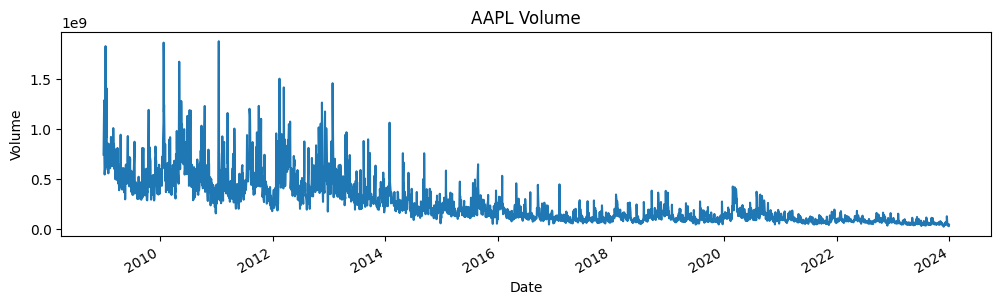

In [22]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df_price.index, df_price["Close"])
ax1.set_title("AAPL Close Price")
ax1.set_ylabel("Price")
plt.show()

df_price["Volume"].plot(figsize=(12,3))
plt.title("AAPL Volume")
plt.ylabel("Volume")
plt.show()
